2023-03-07 22:42:58.906613: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-07 22:42:58.906881: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/20


2023-03-07 22:42:59.919224: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-07 22:43:00.213983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5160 - accuracy: 0.7799

2023-03-07 22:43:01.517727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 43ms/step - loss: 0.5160 - accuracy: 0.7799 - val_loss: 0.3761 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2998 - accuracy: 0.9019 - val_loss: 0.3188 - val_accuracy: 0.8727
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2170 - accuracy: 0.9293 - val_loss: 0.2828 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1750 - accuracy: 0.9415 - val_loss: 0.2766 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1403 - accuracy: 0.9553 - val_loss: 0.2994 - val_accuracy: 0.8826
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1165 - accuracy: 0.9627 - val_loss: 0.3081 - val_accuracy: 0.8827
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0940 - accuracy: 0.9726 - val_loss: 0.3087 - val_accuracy: 0.8845
Epoch 8/20
30/30 [======

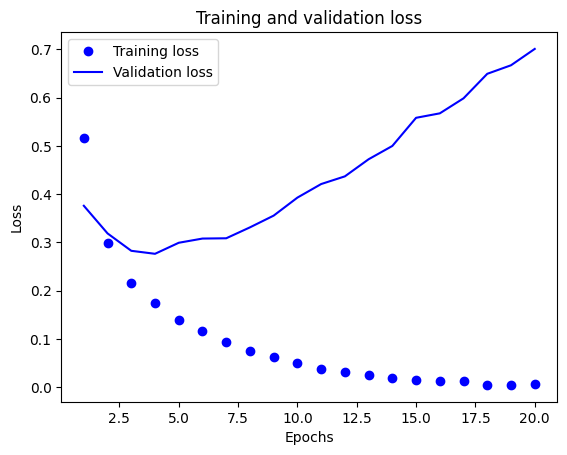

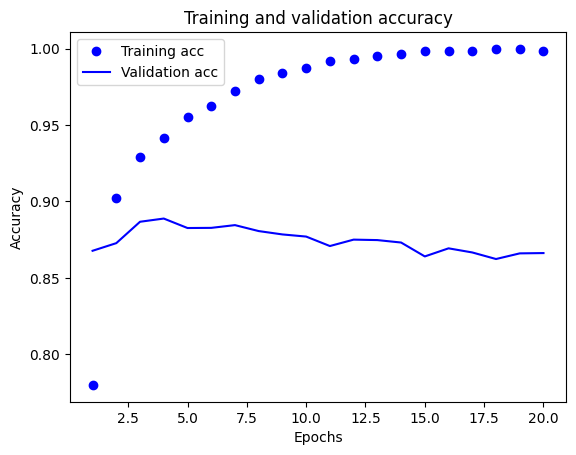

Epoch 1/4


2023-03-07 22:43:12.913807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 13ms/step - loss: 0.4403 - accuracy: 0.8206
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2489 - accuracy: 0.9131
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1971 - accuracy: 0.9270
Epoch 4/4
 21/782 [..............................] - ETA: 3s - loss: 0.3001 - accuracy: 0.8810

2023-03-07 22:43:16.849893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 68/782 [=>............................] - ETA: 1s

2023-03-07 22:43:22.047997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 2s 2ms/step


array([[0.17431058],
       [0.999545  ],
       [0.7362843 ],
       ...,
       [0.10096627],
       [0.03462784],
       [0.56162137]], dtype=float32)

In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

train_data[0]
train_labels[0]

max([max(sequence) for sequence in train_data])

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

model.predict(x_test)

Epoch 1/20


2023-03-07 22:44:45.421560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5014 - accuracy: 0.7885

2023-03-07 22:44:46.745227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 45ms/step - loss: 0.5014 - accuracy: 0.7885 - val_loss: 0.3699 - val_accuracy: 0.8713
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2874 - accuracy: 0.9079 - val_loss: 0.3041 - val_accuracy: 0.8823
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2119 - accuracy: 0.9307 - val_loss: 0.2835 - val_accuracy: 0.8863
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1707 - accuracy: 0.9442 - val_loss: 0.2758 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1330 - accuracy: 0.9577 - val_loss: 0.2863 - val_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1129 - accuracy: 0.9644 - val_loss: 0.3190 - val_accuracy: 0.8771
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0925 - accuracy: 0.9730 - val_loss: 0.3372 - val_accuracy: 0.8750
Epoch 8/20
30/30 [======

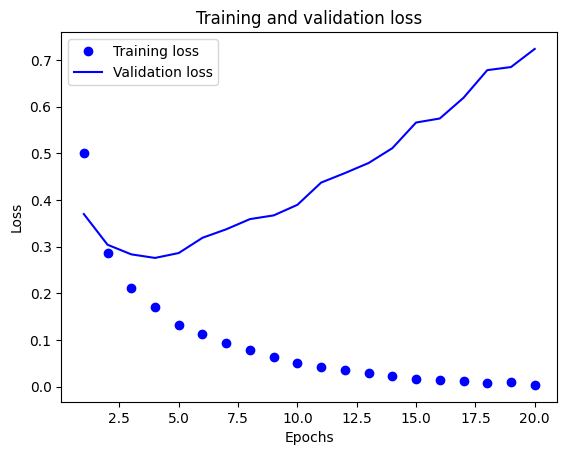

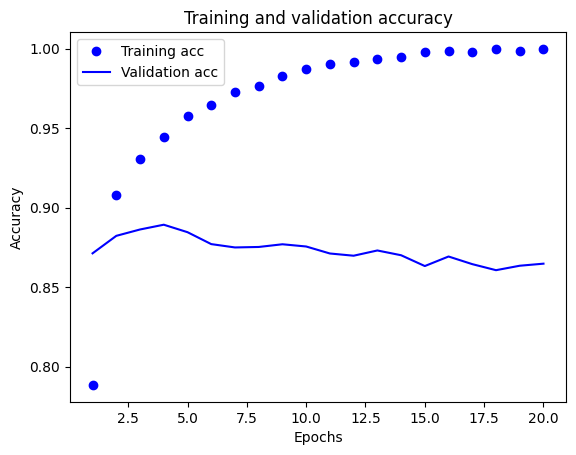

Epoch 1/4


2023-03-07 22:44:57.589767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 14ms/step - loss: 0.4395 - accuracy: 0.8206
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2501 - accuracy: 0.9113
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1950 - accuracy: 0.9308
Epoch 4/4
 10/782 [..............................] - ETA: 4s - loss: 0.2598 - accuracy: 0.8906  

2023-03-07 22:45:01.600679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 4s 5ms/step - loss: 0.3096 - accuracy: 0.8782
[0.30962803959846497, 0.8782400488853455]
 59/782 [=>............................] - ETA: 1s

2023-03-07 22:45:06.789168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 2s 2ms/step


array([[0.2965236 ],
       [0.99972075],
       [0.9639491 ],
       ...,
       [0.17198408],
       [0.09209482],
       [0.76169884]], dtype=float32)

In [2]:
import tensorflow as tf

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

train_data[0]
train_labels[0]

max([max(sequence) for sequence in train_data])

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

print(results)

model.predict(x_test)

In [3]:
print(results)


[0.30962803959846497, 0.8782400488853455]
